In [2]:
import pandas as pd
loan_df = pd.read_csv('loan_data_2007_2014.csv')

C:\Users\joao.freire\AppData\Local\Temp\ipykernel_2296\4196566791.py:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_df = pd.read_csv('loan_data_2007_2014.csv')


In [3]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

## Duplicates

In [4]:
# N of rows
import numpy as np

print(
    len(loan_df)
    , loan_df.duplicated().sum()
)

# No duplicated columns

466285 0


## Feature Selection and Imputing

In [5]:
# Counting the number of NaN for each column
#loan_df.isnull().sum().sort_values(ascending=False) 
for col in loan_df.columns:
    print(f"{round(float(loan_df[col].isnull().sum()/len(loan_df[col]))*100)}% Missing Values on Column {col}")

0% Missing Values on Column Unnamed: 0
0% Missing Values on Column id
0% Missing Values on Column member_id
0% Missing Values on Column loan_amnt
0% Missing Values on Column funded_amnt
0% Missing Values on Column funded_amnt_inv
0% Missing Values on Column term
0% Missing Values on Column int_rate
0% Missing Values on Column installment
0% Missing Values on Column grade
0% Missing Values on Column sub_grade
6% Missing Values on Column emp_title
5% Missing Values on Column emp_length
0% Missing Values on Column home_ownership
0% Missing Values on Column annual_inc
0% Missing Values on Column verification_status
0% Missing Values on Column issue_d
0% Missing Values on Column loan_status
0% Missing Values on Column pymnt_plan
0% Missing Values on Column url
73% Missing Values on Column desc
0% Missing Values on Column purpose
0% Missing Values on Column title
0% Missing Values on Column zip_code
0% Missing Values on Column addr_state
0% Missing Values on Column dti
0% Missing Values on C

In [31]:
# emp_title
loan_df['emp_title'].unique()
# Como fazer filtro com operador Like? -> procurar 'unemployed'
# len(loan_df[loan_df['emp_title'].str.contains('Unemployed')])


ValueError: Cannot mask with non-boolean array containing NA / NaN values

In [32]:
# emp_length
loan_df['emp_length'].unique()
# O que são os NAs? Desempregado?
# Encode -> emprego estável

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [6]:
loan_df['desc'].unique()
# Coluna muito caótica. Dropar

array(['  Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>',
       '  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br>  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>',
       nan, ...,
       '  Borrower added on 12/09/13 > consolidate all credit accounts<br>',
       '  Borrower added on 12/06/13 > I am going to consolidate a credit card debt from medical and moving expenses with a loan I already have. I have paid everything on time for years, I just need to eliminate this

In [7]:
loan_df['mths_since_last_delinq'].unique()
# O que significa o NA nessa coluna? Não tem descrição. Dropar.
# mths_since_last_record idem

array([ nan,  35.,  38.,  61.,   8.,  20.,  18.,  68.,  45.,  48.,  41.,
        40.,  74.,  25.,  53.,  39.,  10.,  26.,  56.,  77.,  28.,  52.,
        24.,  16.,  60.,  54.,  23.,   9.,  11.,  13.,  65.,  19.,  80.,
        22.,  59.,  79.,  44.,  64.,  57.,  14.,  63.,  49.,  15.,  73.,
        70.,  29.,  51.,   5.,  75.,  55.,   2.,  30.,  47.,  33.,  69.,
         4.,  43.,  21.,  27.,  46.,  81.,  78.,  82.,  31.,  76.,  62.,
        72.,  42.,  50.,   3.,  12.,  67.,  36.,  34.,  58.,  17.,  71.,
        66.,  32.,   6.,  37.,   7.,   1.,  83.,  86., 115.,  96., 103.,
       120., 106.,  89., 107.,  85.,  97.,  95.,   0., 110.,  84., 135.,
        88.,  87., 122.,  91., 146., 134., 114.,  99.,  93., 127., 101.,
        94., 102., 129., 113., 139., 131., 156., 143., 109., 119., 149.,
       118., 130., 148., 126.,  90., 141., 116., 100., 152.,  98.,  92.,
       108., 133., 104., 111., 105., 170., 124., 136., 180., 188., 140.,
       151., 159., 121.])

In [8]:
loan_df['next_pymnt_d'].unique() # Sem interpretação do que são os NAs

array([nan, 'Feb-16', 'Jan-16', 'Sep-13', 'Feb-14', 'May-14', 'Jun-13',
       'Mar-12', 'Apr-12', 'May-13', 'Aug-12', 'Aug-13', 'Jun-12',
       'Nov-13', 'Feb-12', 'Oct-11', 'Jan-13', 'Jan-14', 'Jul-13',
       'Jul-15', 'Jan-12', 'Dec-12', 'Jun-11', 'Feb-13', 'Nov-11',
       'Nov-12', 'Dec-11', 'Aug-11', 'Sep-11', 'Apr-11', 'Mar-14',
       'Apr-13', 'Mar-11', 'Jul-12', 'Aug-14', 'Oct-13', 'Sep-12',
       'May-12', 'Apr-15', 'Jul-11', 'Dec-15', 'Dec-13', 'Jan-11',
       'Oct-12', 'Nov-14', 'Mar-13', 'Aug-15', 'Feb-15', 'May-15',
       'Jul-14', 'Nov-15', 'Sep-14', 'Oct-15', 'May-11', 'Feb-11',
       'Dec-14', 'Jun-15', 'Apr-14', 'Jan-15', 'Sep-15', 'Jun-14',
       'Nov-10', 'Oct-10', 'Dec-10', 'Mar-15', 'Oct-14', 'Jul-10',
       'Sep-10', 'May-10', 'Aug-10', 'Mar-10', 'Jun-10', 'Apr-10',
       'Feb-10', 'Dec-09', 'Nov-09', 'Oct-09', 'Jan-10', 'Sep-09',
       'Jun-09', 'Aug-09', 'Jul-09', 'May-09', 'Apr-09', 'Jan-09',
       'Oct-08', 'Feb-09', 'Nov-08', 'Sep-08', 'Mar-09', 

In [9]:
# Total collection amounts ever owed -> Tem 0 e tem NA. O zero significa NA? Incerto.
loan_df['tot_coll_amt'].unique()

array([   nan,     0., 15386., ..., 16125.,  9778.,  6532.])

In [10]:
# Total current balance of all accounts. 15% de NA. Variável boa, pq é uma medida do poder de pagamento.
loan_df['tot_cur_bal'].value_counts()

# IMPUTAR com média ou mediana?
print(f"Mean = {loan_df['tot_cur_bal'].mean()}\nMedian = {loan_df['tot_cur_bal'].median()}")

# Mediana talvez seja melhor

Mean = 138801.71338530185
Median = 81539.0


<AxesSubplot:>

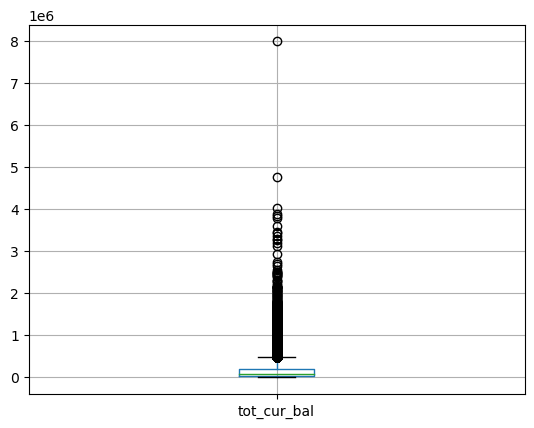

In [11]:
loan_df[['tot_cur_bal']].boxplot()
# Muito outlier -> Min/max?

In [12]:
# Total revolving high credit/ credit limit
loan_df['total_rev_hi_lim'].value_counts()

# IMPUTAR com média ou mediana?
print(f"Mean = {loan_df['total_rev_hi_lim'].mean()}\nMedian = {loan_df['total_rev_hi_lim'].median()}")

# 

Mean = 30379.087770732483
Median = 22800.0


In [13]:
loan_df[['total_rev_hi_lim']].boxplot()
# muito outlier. Min/Max

<AxesSubplot:>

In [16]:
loan_df[['tot_cur_bal', 'total_rev_hi_lim']].isnull().sum()

tot_cur_bal         0
total_rev_hi_lim    0
dtype: int64

In [33]:
# Fazer com pipe?
#### Faltando tratar emp_title e emp_length

# Imputer
from sklearn.impute import SimpleImputer

# Instantiate a SimpleImputer object with your strategy of choice
imputer = SimpleImputer(strategy="median") 

# Call the "fit" method on the object
imputer.fit(loan_df[['tot_cur_bal', 'total_rev_hi_lim']]) 

# Call the "transform" method on the object
loan_df[['tot_cur_bal', 'total_rev_hi_lim']] = imputer.transform(loan_df[['tot_cur_bal', 'total_rev_hi_lim']]) 

# The mean is stored in the transformer's memory
imputer.statistics_ 

array([81539., 22800.])

In [34]:
# Dropping features with very high percentage of missing values
loan_df.drop(columns = ['Unnamed: 0', 'desc', 'mths_since_last_delinq', 'mths_since_last_record', 'annual_inc_joint', 'annual_inc_joint'
                        , 'dti_joint', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'next_pymnt_d'
                        , 'mths_since_last_major_derog', 'verification_status_joint', 'mths_since_rcnt_il', 'total_bal_il'
                        , 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl'
                        , 'inq_last_12m']
             , inplace = True)


KeyError: "['desc', 'mths_since_last_delinq', 'mths_since_last_record', 'annual_inc_joint', 'annual_inc_joint', 'dti_joint', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'next_pymnt_d', 'mths_since_last_major_derog', 'verification_status_joint', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m'] not found in axis"

In [35]:
for col in loan_df.columns:
    print(f"{round(float(loan_df[col].isnull().sum()/len(loan_df[col]))*100)}% Missing Values on Column {col}")
    
# tot_col_amnt ainda não sabemos o q fazer com essa variável

0% Missing Values on Column Unnamed: 0
0% Missing Values on Column id
0% Missing Values on Column member_id
0% Missing Values on Column loan_amnt
0% Missing Values on Column funded_amnt
0% Missing Values on Column funded_amnt_inv
0% Missing Values on Column term
0% Missing Values on Column int_rate
0% Missing Values on Column installment
0% Missing Values on Column grade
0% Missing Values on Column sub_grade
6% Missing Values on Column emp_title
5% Missing Values on Column emp_length
0% Missing Values on Column home_ownership
0% Missing Values on Column annual_inc
0% Missing Values on Column verification_status
0% Missing Values on Column issue_d
0% Missing Values on Column loan_status
0% Missing Values on Column pymnt_plan
0% Missing Values on Column url
0% Missing Values on Column purpose
0% Missing Values on Column title
0% Missing Values on Column zip_code
0% Missing Values on Column addr_state
0% Missing Values on Column dti
0% Missing Values on Column delinq_2yrs
0% Missing Value

## Correlation

In [44]:
# Heatmap of pairwise correlations
correlation_matrix = loan_df.corr()
column_names = correlation_matrix.columns
sns.heatmap(correlation_matrix, xticklabels=column_names, yticklabels=column_names,cmap= "twilight_shifted");
# Não tá rodando...

In [ ]:
# Converting the correlation matrix into a DataFrame
corr_df = correlation_matrix.stack().reset_index()

# Renaming the columns
corr_df.columns = ['feature_1','feature_2', 'correlation']

# Remove "self correlations"
no_self_correlation = (corr_df['feature_1'] != corr_df['feature_2'])
corr_df = corr_df[no_self_correlation]

## Outliers

<Figure size 400x300 with 0 Axes>

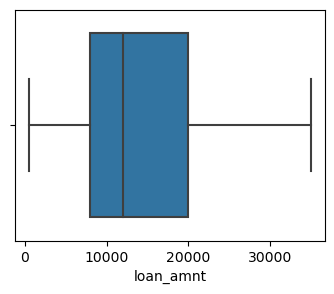

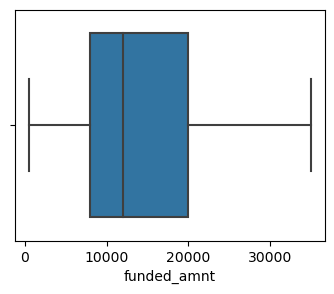

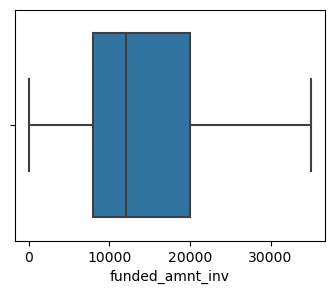

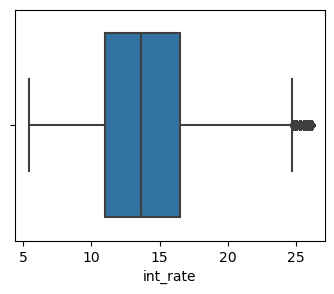

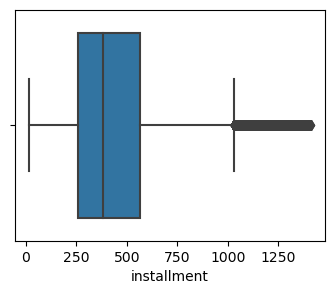

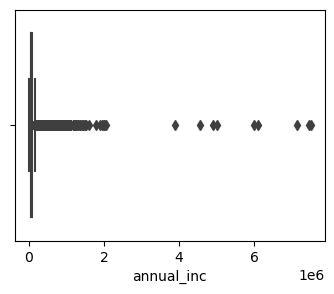

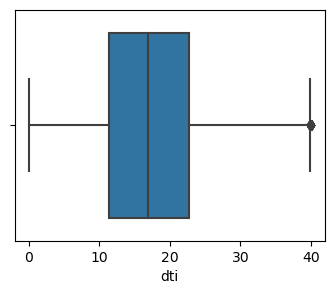

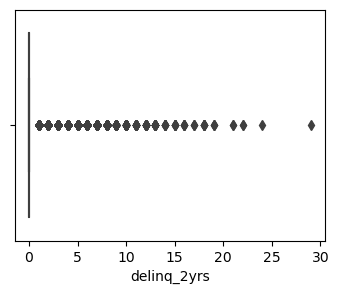

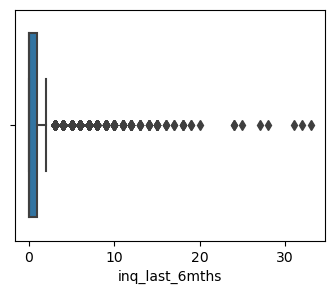

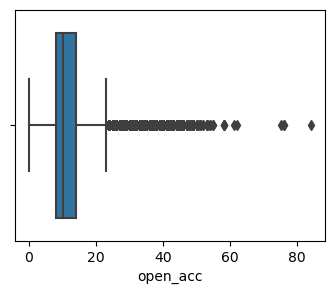

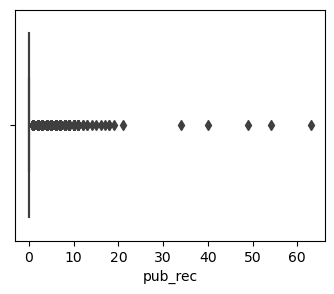

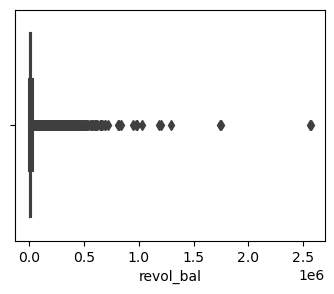

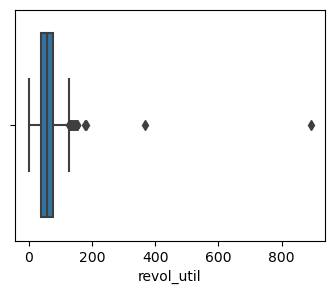

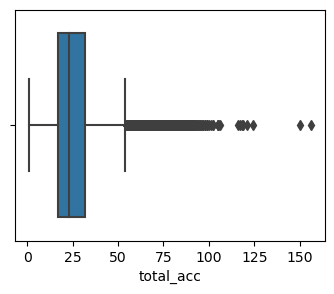

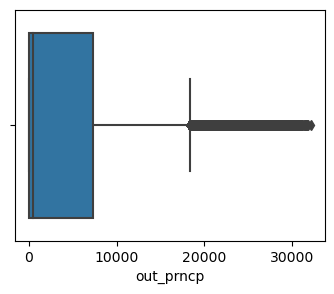

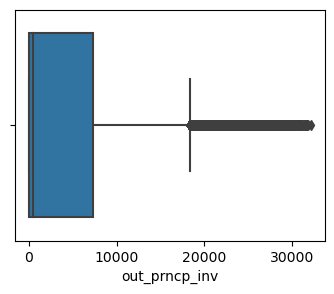

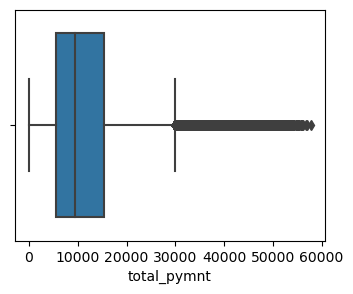

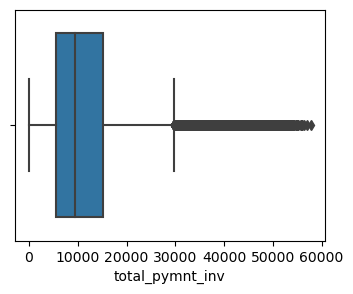

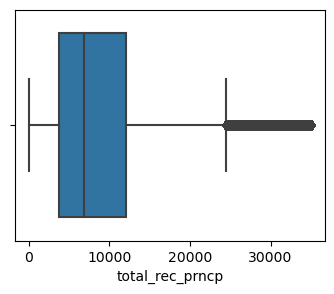

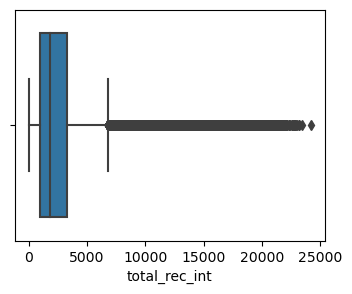

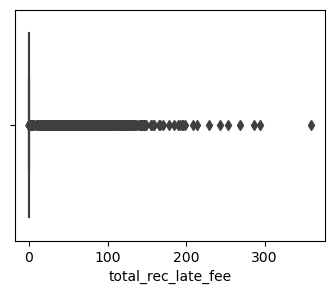

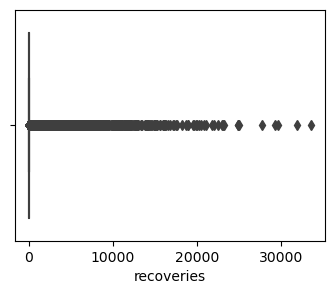

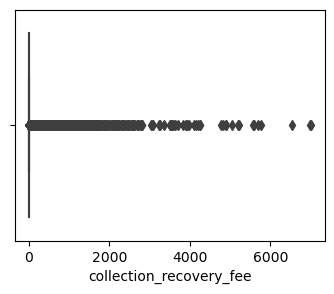

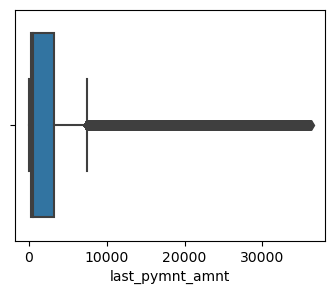

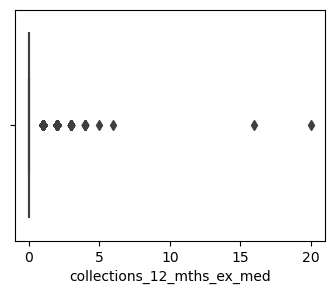

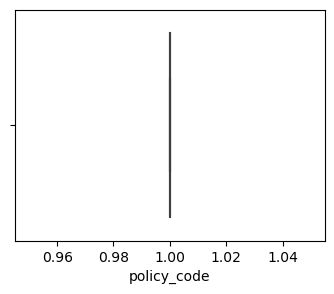

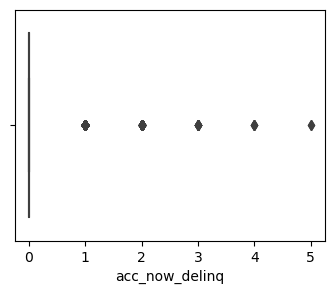

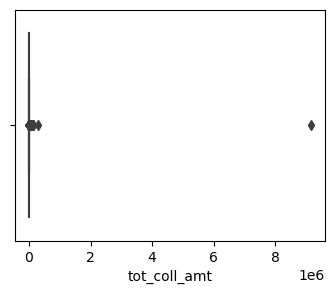

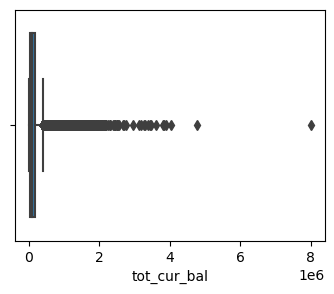

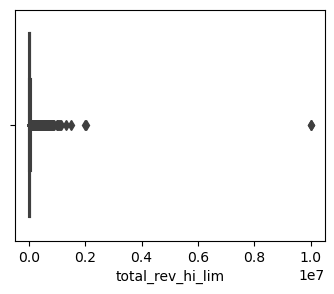

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import is_numeric_dtype

for col in loan_df.iloc[:,3:]:
    if is_numeric_dtype(loan_df[col]):
        plt.figure(figsize=(4, 3))
        sns.boxplot(data = loan_df, x = col)
        plt.show();
        # Consigo colocar um do lado do outro?
        
# The upper and lower limits are the IQR -> past them, everything is an outlier
# Cols:
# 'total_rev_hi_lim', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs'(tem mt zero... oq fazer?)
# , 'inq_last_6mths', 'open_acc', 'pub_rec'
# , 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp'
# , 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med'
# , 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'

# Fazer Robust Scaler nessas variáveis acima (outliers)
# RobustScaler = (x - median)/IQR


# Colunas esquisitas: 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'pub_rec' --> considerar OHE nessas

In [40]:
# Tests
loan_df['acc_now_delinq'].unique()

array([ 0.,  1., nan,  2.,  3.,  5.,  4.])

In [ ]:
loan_df.drop(columns = ['policy_code']
             , inplace = True)


In [ ]:
# Implementar Robust Scaler
from sklearn.preprocessing import RobustScaler

# Step 0 - Instanciate Robust Scaler

rb_scaler = RobustScaler() 

# Step 1- Fit the scaler to the `GrLiveArea`
# to "learn" the median value and the IQR

rb_scaler.fit(data[['total_rev_hi_lim', 'int_rate', 'installment', 'annual_inc', 'dti'
    , 'inq_last_6mths', 'open_acc', 'pub_rec'
    , 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp'
    , 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med'
    , 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']]) 

# 2-Scale/Transform
# <-> apply the transformation (value - median) / IQR for every house

data[['total_rev_hi_lim', 'int_rate', 'installment', 'annual_inc', 'dti', 'inq_last_6mths', 'open_acc', 'pub_rec'
    , 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp'
    , 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt'
      , 'collections_12_mths_ex_med', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']] = rb_scaler.transform(data[[
    'total_rev_hi_lim', 'int_rate', 'installment', 'annual_inc', 'dti', 'inq_last_6mths', 'open_acc', 'pub_rec'
    , 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp'
    , 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt'
    , 'collections_12_mths_ex_med', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']]) 

data.head()

## Categorical Features

In [ ]:
#### Balancear o dataset?
# Balancing strategies
# Oversampling of minority class
# Alternatively, Computation of new instances for the minority class
# Undersampling of majority class

# Use balancing techniques only on the training set to help the model learn about the minority class.
# The test set should remain representative of the real word.

### SMOTE?

### Encodings
# Ordinal Encoder -> se tiver lógica crescente entre as categorias
# One Hot Encoder -> se NÃO tiver lógica crescente entre as categorias


## Preprocessing Pipeline

In [ ]:
from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

from sklearn.preprocessing import OridnalEncoder
from sklearn.preprocessing import OneHotEncoder


# Impute then scale numerical values: 
num_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy="mean")),
    ('standard_scaler', StandardScaler())
])

# Encode categorical values
cat_transformer = OneHotEncoder(handle_unknown='ignore')

# Parallelize "num_transformer" and "cat_transfomer"
preprocessor = ColumnTransformer([
    ('num_transformer', num_transformer, ['age', 'bmi']),
    ('cat_transformer', cat_transformer, ['smoker', 'region'])
])

In [ ]:
 # Visualizing Pipelines in HTML
from sklearn import set_config; set_config(display='diagram')
preprocessor

In [ ]:
X_train_transformed = preprocessor.fit_transform(X_train)

pd.DataFrame(
    X_train_transformed, 
    columns=preprocessor.get_feature_names_out()
).head()

In [ ]:
# Full preprocessing pipeline
from sklearn.compose import make_column_selector

num_transformer = make_pipeline(SimpleImputer(), StandardScaler())
num_col = make_column_selector(dtype_include=['float64'])

cat_transformer = OneHotEncoder()
cat_col = make_column_selector(dtype_include=['object','bool'])

preproc_basic = make_column_transformer(
    (num_transformer, num_col),
    (cat_transformer, cat_col),
    remainder='passthrough'
)

preproc_full = make_union(preproc_basic, bmi_age_ratio_constructor)

preproc_full